<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_IEEE_Deteccion_Fraude/blob/main/Scripts/IEEE_Deteccion_Fraude__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos - Proyecto IEEE-CIS Deteccion de fraude

Sitio del concurso: https://www.kaggle.com/competitions/ieee-fraud-detection/overview
  
Datos: https://drive.google.com/drive/folders/1lhKnZfq2jQKkivLTFbmWn6ZSvNm8cKIe?usp=share_link
  
Deben seguir las instrucciones dadas en el pdf, esto es 
- Ser invitados como colaboradores del repositorio en GitHub 
- Abrir la carpeta y hacer un acceso directo en su drive 
- Conectar el Colab con su drive 

Recuerden que deben cambiar la carpeta que será el workspace o las rutas para poder importar los datos.

Finalmente, seguir las instrucciones del pdf para escribir en GitHub los cambios para que se noten sus aportes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Preliminares

In [2]:
import pandas as pd
import numpy as np
import os
import textwrap
import matplotlib.pyplot as pl

In [3]:
! pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 KB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 KB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.3 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting unin

In [11]:
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.6 

In [12]:
from skimpy import skim

In [13]:
from dataprep.eda import create_report

In [4]:
## Esto debe ser modificado por uds, por favor creen otra linea y comenten esta 
##os.chdir('/content/drive/MyDrive/CURSOS_DICTADOS/TUTORIAS/PrDS_2023_01_IEEE_Deteccion_Fraude')
os.chdir('/content/drive/MyDrive/cc_fraude/dataset')

In [5]:
## HZ CONEXION
os.chdir('/content/drive/MyDrive/Python_Colab/Datos/')

FileNotFoundError: ignored

In [14]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y 
que no toque hacer desplazamiento horizontal'''
wrapper = textwrap.TextWrapper(width=100)

## EDA

### Importar

#### Importar

In [7]:
train_identity= pd.read_csv('train_identity.csv')
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [15]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34',
'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
'id_32']


In [16]:
train_transaction= pd.read_csv('train_transaction.csv')
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5',
'M6', 'M7', 'M8', 'M9']
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT', 'card1']
Columnas Float
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3',
'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5',
'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34',
'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48',
'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V

#### Cambiar el tipo de datos a las columnas

De acuerdo al sitio oficial, todos es numérico excepto:   

'TransactionID' que es ID, entero, 'isFraud' que es 0 o 1 y 'TransactionDT' que es timedelta (puede tomarse como entero)

**Categorical Features - Transaction**  
ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9

**Categorical Features - Identity**  
DeviceType, DeviceInfo, id_12 - id_38  

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

##### Transacciones

In [17]:
# Columnas categoricas
cols_cat_trns= ['ProductCD', 
            'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
            'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [18]:
# Columnas enteras
cols_int_trns= ['TransactionID', 'isFraud', 'TransactionDT']

In [20]:
# Columnas Categoricas
cols_cat_trns = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6','addr1','addr2', 'P_emaildomain', 'R_emaildomain', 'M1','M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [19]:
for column in train_transaction.columns:      
    if column in cols_cat_trns:
        train_transaction[column] = train_transaction[column].astype(str)
    elif column in cols_int_trns:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce', downcast= 'integer' )        
    else:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce')

In [22]:
for c in train_transaction.columns:
  if c in cols_cat_trns:
    train_transaction[c] = train_transaction[c].astype('category')

In [ ]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT']
Columnas Float
['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V

---
##### Identidades

Para la de identidades, todo es categorico excepto:




In [ ]:
# Columnas categoricas
cols_int_idnt= ['TransactionID']

In [ ]:
# Columnas numericas
cols_num_idnt= ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11']

In [ ]:
for column in train_identity.columns:      
    if column in cols_int_idnt:         
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'integer' )
    elif column in cols_num_idnt:
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'float')
    else:
        train_identity[column] = train_identity[column].astype(str)

In [ ]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,nan
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


#### Unir los datos

In [ ]:
train= pd.merge( train_transaction, train_identity, how= "left", on= 'TransactionID')

In [ ]:
train.shape

(590540, 434)

In [ ]:
## Para proteger la ram, eliminar 
del train_transaction
del train_identity

In [ ]:
import gc
gc.collect()

56510

### EDA univariado

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.

In [ ]:
skim(train[1:100])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 99     │ │ float64     │ 382   │                                                          │
│ │ Number of columns │ 434    │ │ string      │ 49    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0       ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ TransactionID     │   0 │     0 │   3000000 │      29 │  3000000 │  3000000 │  3000000 │  3000000 │ ██████ │  │
│ │ isFraud           │   0 │     0 │         0 │       0 │        0 │        0 │        0 │        0 │     █  │  │
│ │ TransactionDT     │   0 │     0 │     87000 │     520 │    86000 │    87000 │    88000 │    88000 │ ▆▄▆▅█▇ │  │
│ │ TransactionAmt    │   0 │     0 │       150 │     270 │      3.1 │       40 │      150 │     2500 │   █▁   │  │
│ │ dist1             │  59 │    60 │       100 │     370 │        0 │      3.8 │       22 │     2200 │   █    │  │
│ │ dist2             │  93 │    94 │       200 │     270 │       30 │       88 │      140 │      740 │ █▂   ▂ │  │
│ │ C1                │   0 │     0 │       8.3 │      31 │        1 │        1 │        3 │      200 │   █    │  │
│ │ C2                │   0 │     0 │       7.5 │      29 │        1 │        1 │        2 │      210 │   █    │  │
│ │ C3                │   0 │     0 │         0 │       0 │        0 │        0 │        0 │        0 │     █  │  │
│ │ C4                │   0 │     0 │       0.2 │    0.51 │        0 │        0 │        0 │        3 │  █ ▁   │  │
│ │ C5                │   0 │     0 │       6.1 │      28 │        0 │        0 │        1 │      170 │   █    │  │
│ │ C6                │   0 │     0 │       6.6 │      26 │        0 │        1 │        2 │      180 │   █    │  │
│ │ C7                │   0 │     0 │      0.13 │    0.37 │        0 │        0 │        0 │        2 │  █  ▁  │  │
│ │ C8                │   0 │     0 │      0.29 │    0.86 │        0 │        0 │        0 │        6 │   █▂   │  │
│ │ C9                │   0 │     0 │       4.6 │      18 │        0 │        0 │      1.5 │      130 │   █    │  │
│ │ C10               │   0 │     0 │       1.2 │     9.4 │        0 │        0 │        0 │       93 │   █    │  │
│ │ C11               │   0 │     0 │       6.2 │      25 │        1 │        1 │        2 │      180 │   █    │  │
│ │ C12               │   0 │     0 │      0.14 │     0.4 │        0 │        0 │        0 │        2 │  █  ▁  │  │
│ │ C13               │   0 │     0 │        27 │     100 │        1 │        1 │       10 │      670 │   █    │  │
│ │ C14               │   0 │     0 │       6.3 │      22 │        1 │        1 │      2.5 │      150 │   █    │  │
│ │ D1                │   0 │     0 │        69 │     130 │        0 │        0 │       66 │      540 │ █▁▁  ▁ │  │
│ │ D2                │  54 │    55 │       140 │     16

In [ ]:
skim(train[101:200])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 99     │ │ float64     │ 382   │                                                          │
│ │ Number of columns │ 434    │ │ string      │ 49    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean      ┃ sd     ┃ p0        ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ TransactionID     │   0 │     0 │   3000000 │     29 │   3000000 │  3000000 │  3000000 │  3000000 │ ██████ │  │
│ │ isFraud           │   0 │     0 │         0 │      0 │         0 │        0 │        0 │        0 │     █  │  │
│ │ TransactionDT     │   0 │     0 │     89000 │    440 │     88000 │    89000 │    89000 │    90000 │ ▆██▅▆█ │  │
│ │ TransactionAmt    │   0 │     0 │       200 │    440 │       4.4 │       33 │      140 │     3000 │   █    │  │
│ │ dist1             │  64 │    65 │       190 │    510 │         0 │      4.5 │       34 │     2400 │  █ ▁   │  │
│ │ dist2             │  91 │    92 │       120 │    120 │         6 │      6.8 │      190 │      320 │ █▅ ▃▃▃ │  │
│ │ C1                │   0 │     0 │       5.6 │     24 │         1 │        1 │        2 │      200 │   █    │  │
│ │ C2                │   0 │     0 │       5.2 │     19 │         1 │        1 │        2 │      150 │   █    │  │
│ │ C3                │   0 │     0 │         0 │      0 │         0 │        0 │        0 │        0 │     █  │  │
│ │ C4                │   0 │     0 │      0.27 │   0.53 │         0 │        0 │        0 │        3 │  █ ▂   │  │
│ │ C5                │   0 │     0 │       3.5 │     16 │         0 │        0 │        1 │      120 │   █    │  │
│ │ C6                │   0 │     0 │         4 │     16 │         0 │        1 │        1 │      130 │   █    │  │
│ │ C7                │   0 │     0 │      0.16 │    0.4 │         0 │        0 │        0 │        2 │  █  ▁  │  │
│ │ C8                │   0 │     0 │      0.42 │    1.4 │         0 │        0 │        1 │       13 │   █    │  │
│ │ C9                │   0 │     0 │       3.1 │     14 │         0 │        0 │        1 │      110 │   █    │  │
│ │ C10               │   0 │     0 │       1.3 │     10 │         0 │        0 │        1 │      100 │   █    │  │
│ │ C11               │   0 │     0 │       4.2 │     16 │         1 │        1 │        2 │      130 │   █    │  │
│ │ C12               │   0 │     0 │      0.19 │   0.49 │         0 │        0 │        0 │        2 │  █  ▁  │  │
│ │ C13               │   0 │     0 │        18 │     70 │         0 │        1 │        5 │      480 │   █    │  │
│ │ C14               │   0 │     0 │       4.4 │     19 │         0 │        1 │        2 │      160 │   █    │  │
│ │ D1                │   0 │     0 │        57 │    110 │         0 │        0 │       48 │      460 │   █▁   │  │
│ │ D2                │  55 │    56 │       120 │    130

In [ ]:
# create_report(train[1:10]) # Este proceso es lento

#### ++ Variables con errores

Del eda univariado en lote, ¿existe alguna variable a la que le vean algo raro? Corregirlo (ojo, no digo que exista, deben analizar las tablas y gráficos a detalle)

#### ++ Variables con demasiados NA

In [ ]:
porc_nas= train.isnull().mean()
porc_nas

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.755761
id_37             0.755761
id_38             0.755761
DeviceType        0.755761
DeviceInfo        0.755761
Length: 434, dtype: float64

In [ ]:
## Seleccionar y mostrar columnas con muchos NAs
print( wrapper.fill( str( 
    list( train.columns[ porc_nas > 0.30 ] )
      ) ) )

['dist1', 'dist2', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'V1', 'V2',
'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142',
'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154',
'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178',
'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190',
'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202',
'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214',
'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226',
'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238',
'V239', 'V240', 'V241', 'V242', 'V2

**Debate**  
¿Cuál de estas variables debería eliminarse? Todas? O quizá exista alguna variable donde Y tenga un comportamiento diferente cuando esta llena vs cuando está con NA?? Existen variables cuyos NA son excluyentes (es decir, cuando la una tiene NA la otra tiene valor y viceversa)?

#### ++ Variables con varianza cercana a cero

In [ ]:
dscr_train= train.select_dtypes( include= 'floating').describe()

In [ ]:
# Coeficiente de variacion
dscr_train.loc['CV', :]= dscr_train.apply( lambda x: np.abs( x.loc['std']/x.loc['mean']) , axis=0)

In [ ]:
# Porcentaje NA
dscr_train.loc['Porc_NA', :]=train.select_dtypes( include= 'floating').isnull().mean()

In [ ]:
dscr_train

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
count,590540.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000
mean,135.027176,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,...,174716.593750,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745323
std,239.162522,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,...,159651.812500,0.598231,0.701015,5.249856,16.491104,11.384207,26.084898,0.983842,2.789446,1.127602
min,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000
25%,43.321000,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000
50%,68.769000,8.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000
75%,125.000000,24.000000,206.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000
max,31937.391000,10286.000000,11623.000000,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,...,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000
Porc_NA,0.000000,0.596524,0.936284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.761452,0.887689,0.887689,0.768238,0.768238,0.991271,0.991271,0.873123,0.873123,0.761273


In [ ]:
# Aquí estoy usando El Coeficiente de Variacion: desviación dividida para la media, 
# pero uds pueden usar cualquier otro análisis para encontrar estas variables con poca variabilidad
umbral_CV= 0.03
dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)].columns

KeyError: ignored

In [ ]:
# Ver las descriptivas de estas variables (podría servirnos para ver cambios en percentiles)
dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)]

,V1,V14,V41,V65,V88,V107,V241,V305,id_11
count,311253.000000,514467.000000,421571.000000,513444.000000,501376.000000,590226.000000,130430.000000,590528.000000,140978.000000
mean,0.999945,0.999500,0.999269,0.999663,0.999246,0.999580,1.000238,1.000007,99.745323
std,0.007390,0.022345,0.027020,0.018353,0.027447,0.020494,0.022663,0.002603,1.127602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,90.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,100.000000
CV,0.007391,0.022356,0.027040,0.018359,0.027468,0.020503,0.022658,0.002603,0.011305
Porc_NA,0.472935,0.128819,0.286126,0.130552,0.150987,0.000532,0.779134,0.000020,0.761273


In [ ]:
## Seleccionar columnas por nombre en el train (sólo para probar)
train.loc[ :, dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)].columns ]

,V1,V14,V41,V65,V88,V107,V241,V305,id_11
0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN
1,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
3,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
590538,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN


**Debate**  
¿Está bien usar el coeficiente de variación? O prefieren usar rango intercuartil por ejemplo? O alguna otra medida que les diga cuán "poco variables" son los datos?... Y eliminarían todas las variables? Cuáles sí??

#### ++ Variables categoricas cuyo label mayor es cercano a 100%

Aquí deben desarrollar algo que permita encontrar cuál es el label con mayor frecuencia en cada variable categórica; luego ver el porcentaje de ese label. El resultado debería ser algo así:  

| Variable | Label | Porc |
| --- | --- | --- |
| Satisfacción | Bueno | 90 |
| País_Nacimi | Ecuad | 98 |

Lo que luego nos permitirá filtrar esas variable cuya primer categoría (en frecuencia) sea cercana a 100 (umbral por definir)


# Columnas object que pueden ser potenciales tipo categoria muestro las categorias 'los unicos' y cuantos valores hay por cada categoria

In [ ]:
for col in train.columns:
    if train[col].dtypes == "object":
        print("-----")
        print(col)
        print("UNICOS: "+ str(train[col].nunique()))
        print(train[col].value_counts(dropna=False))
        print("-----")

-----
ProductCD
UNICOS: 5
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
-----
-----
card1
UNICOS: 13553
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: card1, Length: 13553, dtype: int64
-----
-----
card2
UNICOS: 501
321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
447.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: card2, Length: 501, dtype: int64
-----
-----
card3
UNICOS: 115
150.0    521287
185.0     56346
106.0      1571
nan        1565
144.0      1252
          ...  
199.0         1
221.0         1
209.0         1
132.0         1
173.0         1
Name: card3, Length: 115, dtype: int64
-----
-----
card4
UNICOS: 5
visa                384767
mastercard          189217
american express      8328
discover              6651
nan                   1577
Name

#### ++ Variables categoricas que deben unirse las categorias

En R esto lo hace automaticamente tidymodels (https://recipes.tidymodels.org/reference/step_other.html), en Python no es así y esto afecta mucho en términos de RAM al modelamiento (por la cantidad de variables dummy que se crean)

#### ++ Análisis simple de la variable Y

- Categórica? Cuántos niveles?
- Numérica? Cómo se distribuye? tiene Outliers?

#DIAGRAMAS DE BARRA VARIABLES CATEGORICAS

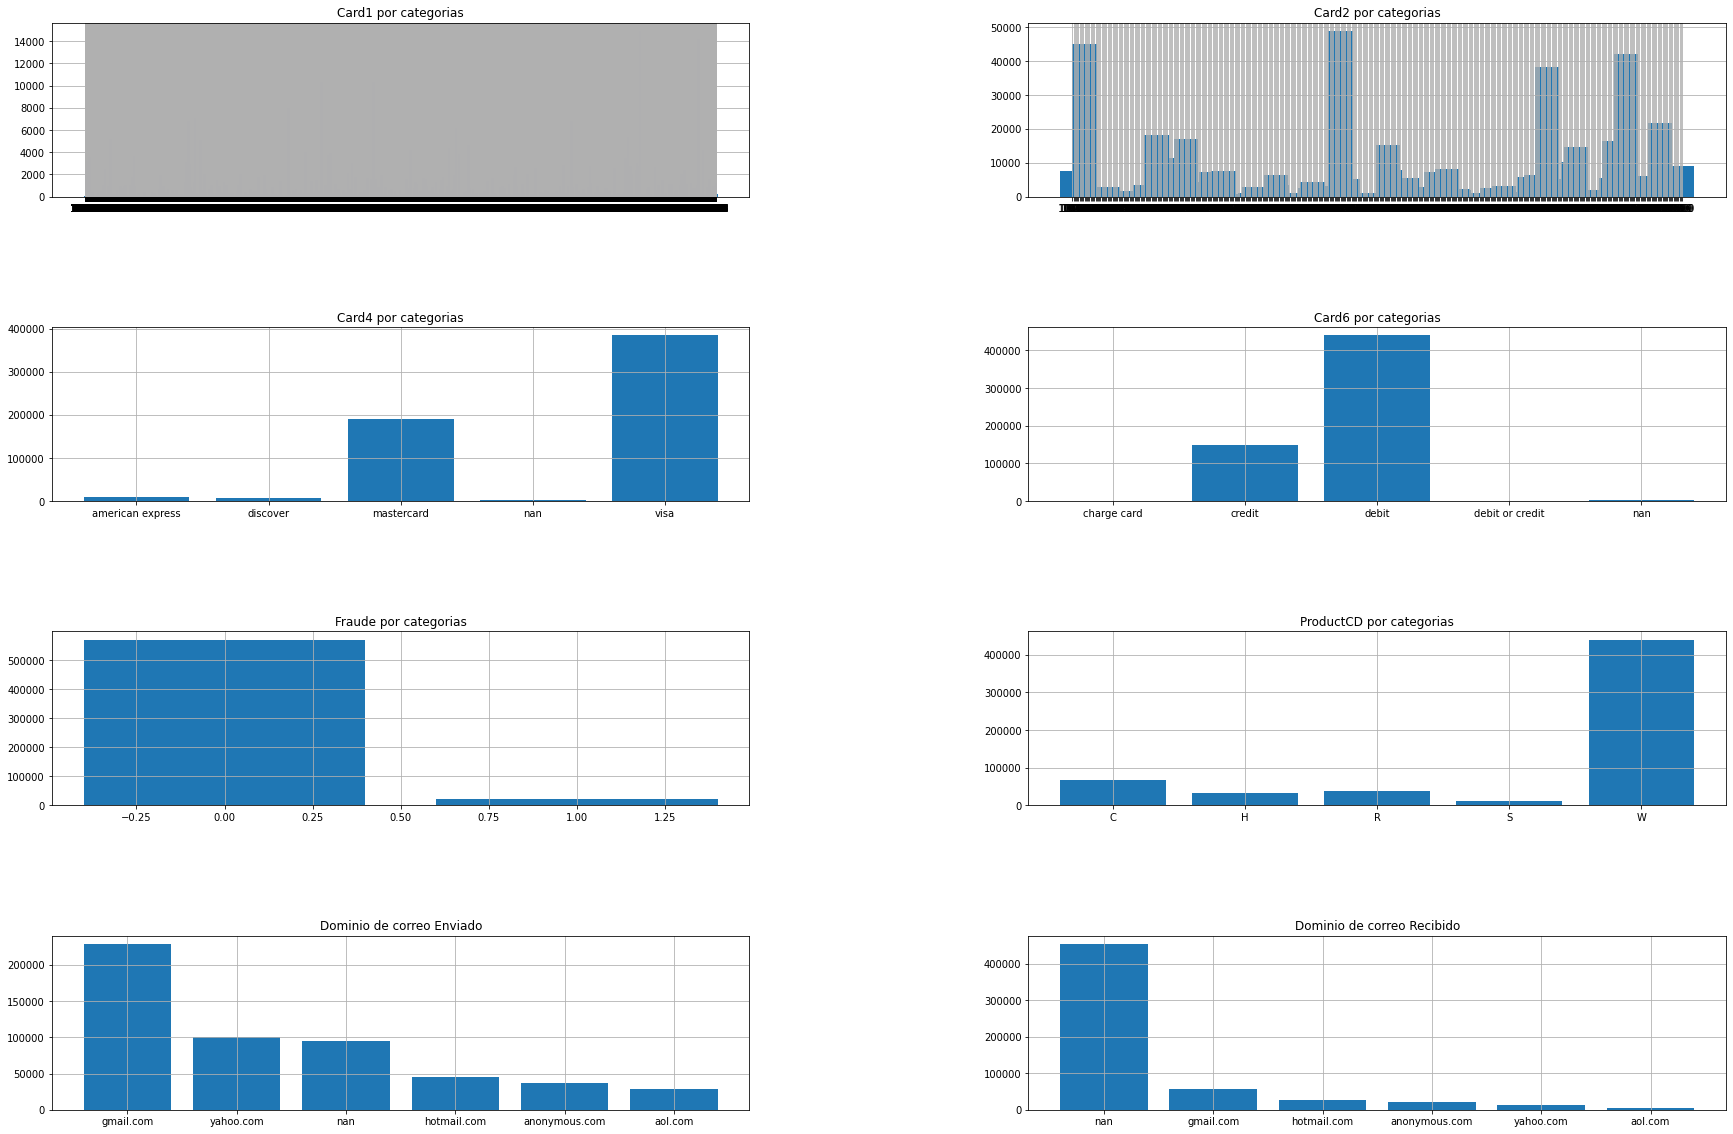

In [ ]:
pl.figure(figsize=(30, 20))
pl.subplots_adjust(hspace=0.75, wspace=0.4)
# CARD1
temp = train.card1.value_counts(dropna=True,sort=True).rename_axis('CARD1').reset_index(name='Conteo').sort_values(by='CARD1')
pl.subplot(421)
#pl.hist(train.card1.cat.categories)
#pl.axis([900,3000,0,7000])
pl.bar(temp.CARD1,temp.Conteo,width=60)
pl.title('Card1 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD2
temp = train.card2.value_counts(dropna=True,sort=True).rename_axis('CARD2').reset_index(name='Conteo').sort_values(by='CARD2')
pl.subplot(422)
#pl.hist(train.card2.cat.categories)
#pl.axis([90,400,0,20000])
pl.bar(temp.CARD2, temp.Conteo,width=20)
pl.title('Card2 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD4
temp = train.card4.value_counts(dropna=True,sort=True).rename_axis('CARD4').reset_index(name='Conteo').sort_values(by='CARD4')
pl.subplot(423)
#pl.bar(train.card4.cat.categories, train.card4.value_counts())
pl.bar(temp.CARD4, temp.Conteo)
pl.title('Card4 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD6
temp = train.card6.value_counts(dropna=True,sort=True).rename_axis('CARD6').reset_index(name='Conteo').sort_values(by='CARD6')
pl.subplot(424)
pl.bar(temp.CARD6, temp.Conteo)
#pl.bar(train.card6.cat.categories, train.card6.value_counts())
pl.title('Card6 por categorias')
pl.grid(True)
#print(temp.head(10))
#ISFRAUD
temp = train.isFraud.value_counts(dropna=True,sort=True).rename_axis('isFraud').reset_index(name='Conteo').sort_values(by='isFraud')
pl.subplot(425)
pl.bar([0,1], temp.Conteo)
#pl.bar(train.isFraud.cat.categories, train.isFraud.value_counts())
pl.title('Fraude por categorias')
pl.grid(True)
#print(temp.head(10))
#ProductCD
temp = train.ProductCD.value_counts(dropna=True,sort=True).rename_axis('ProductCD').reset_index(name='Conteo').sort_values(by='ProductCD')
pl.subplot(426)
#pl.bar(train.ProductCD.cat.categories, train.ProductCD.value_counts())
pl.bar(temp.ProductCD, temp.Conteo)
pl.title('ProductCD por categorias')
pl.grid(True)
#print(temp.head(10))
#P_emaildomain
temp = train.P_emaildomain.value_counts(dropna=True,sort=True).rename_axis('P_emaildomain').reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)
temp=temp.head(6)
pl.subplot(427)
pl.bar(temp.P_emaildomain, temp.Conteo)
pl.title('Dominio de correo Enviado')
pl.grid(True)
#print(temp.head(10))
#P_emaildomain
temp = train.R_emaildomain.value_counts(dropna=True,sort=True).rename_axis('R_emaildomain').reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)
temp = temp.head(6)
pl.subplot(428)
pl.bar(temp.R_emaildomain, temp.Conteo)
pl.title('Dominio de correo Recibido')
pl.grid(True)
#print(temp.head(10))


#### Conclusiones

Aquí deben poner las conclusiones de todo el proceso de EDA:  
- ¿Qué variables se eliminan y porqué?
- ¿Qué variables se van a transformar, por ejemplo creando una nueva que sea binaria e indique que hubo missing_value
- ¿Existe alguna variables que amerite realizarle una transformación (cuadrática, logaritmica)?

--------------
--------------
--------------

### EDA Multivariado

Para encontrar 
- Relaciones entre variables como variables que pueden producir tener multicolinearidad o concurvidad, etc.
- Cómo se comportan las variables vs la variable Y 
- Existen valores aberrantes cuando se comparan variables (o pares de variables) vs nuestra Y

#### ++ Variables con alta correlación